## Prototype Clustering with K-Means

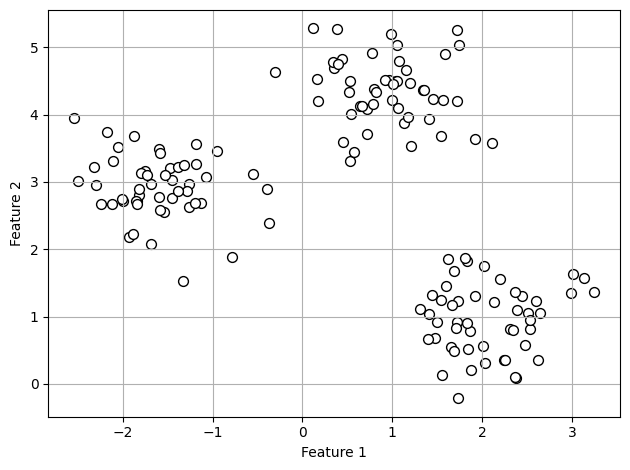

In [13]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples

X, y = make_blobs(
    n_samples=150, n_features=2, centers=3, cluster_std=.5, shuffle=True, random_state=0
)

plt.scatter(
    X[:, 0],
    X[:, 1],
    c='white',
    marker='o',
    edgecolor='black',
    s=50
)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.tight_layout()
plt.show()

### Implementing KMeans

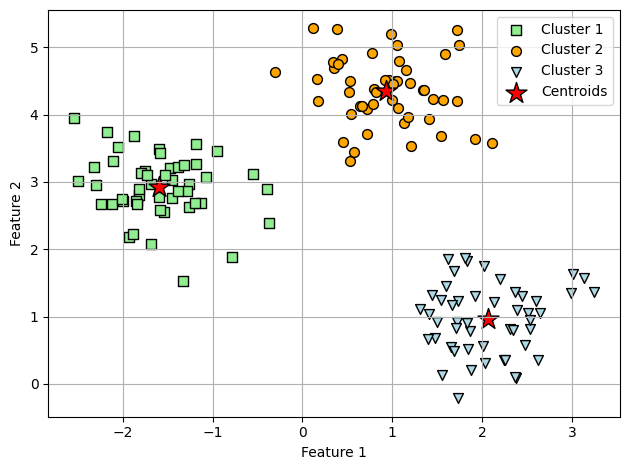

In [14]:
km = KMeans(
    n_clusters=3,
    init='random',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0
)

y_km = km.fit_predict(X)

plt.scatter(
    X[y_km == 0, 0],
    X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='Cluster 1'
)

plt.scatter(
    X[y_km == 1, 0],
    X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='Cluster 2'
)

plt.scatter(
    X[y_km == 2, 0],
    X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='Cluster 3'
)

plt.scatter(
    km.cluster_centers_[:,0],
    km.cluster_centers_[:,1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='Centroids'
)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

### Elbow Method

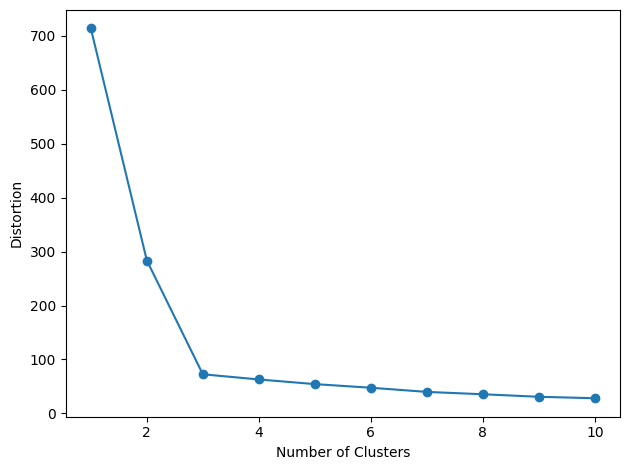

In [15]:
distortions = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Distortion")
plt.tight_layout()
plt.show()

### Silhouette Coef

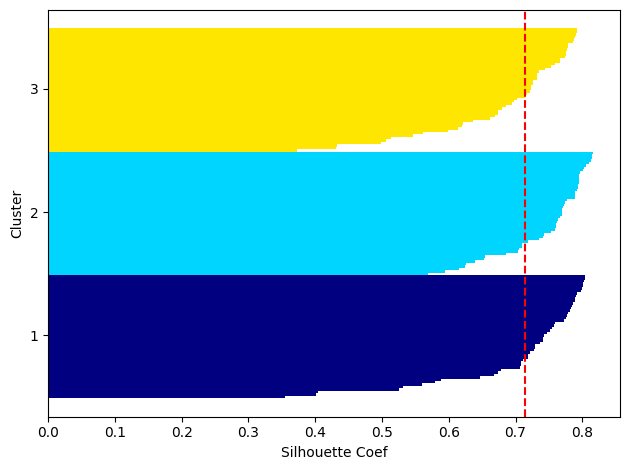

In [21]:
km = KMeans(
    n_clusters=3,
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0
)

y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(
    X, y_km, metric='euclidean'
)

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    
    y_ax_upper += len(c_silhouette_vals)
    
    color = cm.jet(float(i) / n_clusters)
    
    plt.barh(
        range(y_ax_lower, y_ax_upper),
        c_silhouette_vals,
        height=1.0,
        edgecolor=None,
        color=color
    )
    
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg, color='red', linestyle='--')

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')

plt.xlabel("Silhouette Coef")
plt.tight_layout()
plt.show()

## Example of Bad Kmeans Clustering

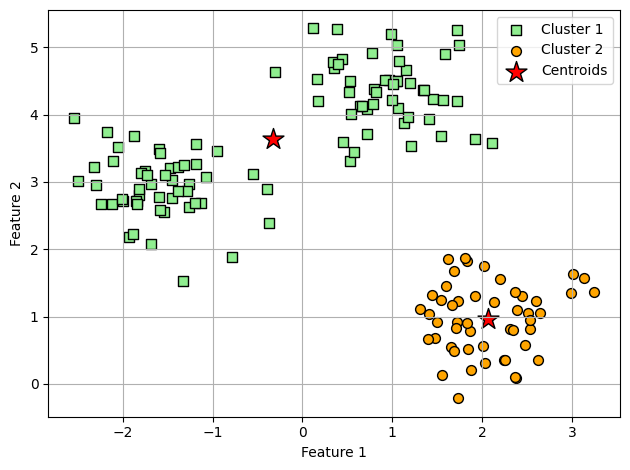

In [25]:
km = KMeans(
    n_clusters=2,
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0
)

y_km = km.fit_predict(X)

plt.scatter(
    X[y_km == 0, 0],
    X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='Cluster 1'
)

plt.scatter(
    X[y_km == 1, 0],
    X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='Cluster 2'
)

plt.scatter(
    km.cluster_centers_[:,0],
    km.cluster_centers_[:,1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='Centroids'
)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

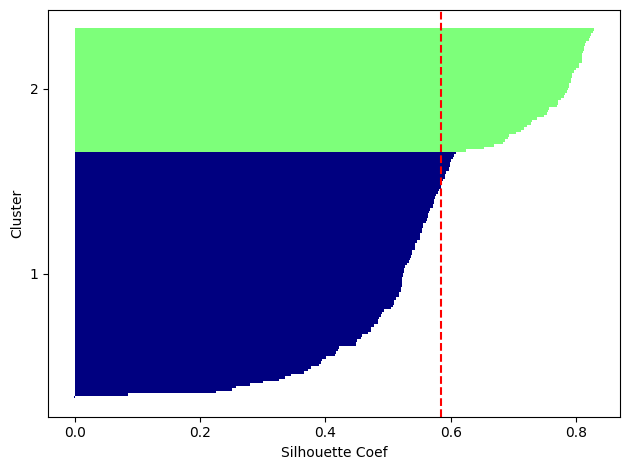

In [24]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(
    X, y_km, metric='euclidean'
)

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    
    y_ax_upper += len(c_silhouette_vals)
    
    color = cm.jet(float(i) / n_clusters)
    
    plt.barh(
        range(y_ax_lower, y_ax_upper),
        c_silhouette_vals,
        height=1.0,
        edgecolor=None,
        color=color
    )
    
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg, color='red', linestyle='--')

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')

plt.xlabel("Silhouette Coef")
plt.tight_layout()
plt.show()